In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

sns.set_style('whitegrid')

In [72]:
df = pd.read_csv('dataset_projetil.txt',header=None, sep=' ', names=['Posição','Altura'])

In [73]:
X, y = df['Posição'].values, df['Altura'].values

In [107]:
class Vandermonde():
    
    def __init__(self, x, y, ordem, tamanho):
        
        self.tamanho = tamanho
        self.ordem = ordem
        self.A = np.zeros((tamanho, ordem + 1))
        self.x = x
        self.y = y
        
    def __criar_matriz(self):
        
        for i in range(self.ordem + 1):
            for j in range(self.tamanho):
                self.A[j,i] = self.x[j]**i  

        return self.A
    
    def __solve(self):
        A = self.__criar_matriz()
        
        return np.linalg.solve(A.T@A,A.T@self.y)
    
    
    def predict(self, x):
        
        vetor_solu = self.__solve()
        
        return np.dot(self.A, vetor_solu)
    
    def print_matriz(self):
        
        print(f'Matriz de Vandermonde: \n\n{self.A}\n\nVetor b: \n{self.y.T}')

In [98]:
modelo = Vandermode(X, y, 2, len(X))

In [99]:
y_pred_ = modelo.predict(X)

In [100]:
modelo.print_matriz()

Matriz de VanderMode: 

[[1.     0.     0.    ]
 [1.     0.04   0.0016]
 [1.     0.09   0.0081]
 [1.     0.13   0.0169]
 [1.     0.17   0.0289]
 [1.     0.21   0.0441]
 [1.     0.26   0.0676]
 [1.     0.3    0.09  ]
 [1.     0.34   0.1156]
 [1.     0.39   0.1521]
 [1.     0.43   0.1849]
 [1.     0.47   0.2209]
 [1.     0.51   0.2601]
 [1.     0.56   0.3136]
 [1.     0.6    0.36  ]]

Vetor b: 
[0.68 0.74 0.79 0.86 0.86 0.89 0.93 0.97 1.01 0.98 1.04 1.05 1.05 1.07
 1.05]


In [101]:
y_pred_

array([0.68853367, 0.73625593, 0.7912956 , 0.83163679, 0.86869752,
       0.90247776, 0.94008991, 0.96648909, 0.98960779, 1.01389301,
       1.02963064, 1.04208781, 1.05126449, 1.05812219, 1.05991781])

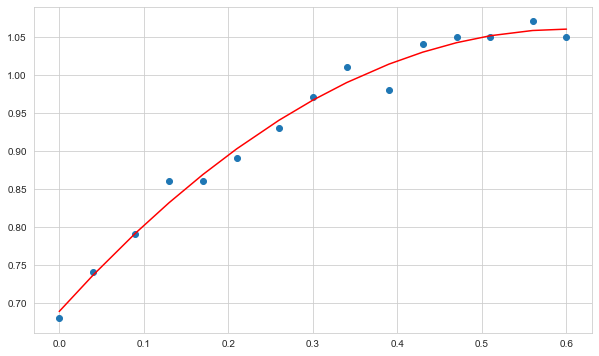

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X, y_pred_, color='red')

In [105]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

polyreg = make_pipeline(PolynomialFeatures(2),LinearRegression())

polyreg.fit(X,y)
y_pred = polyreg.predict(X)

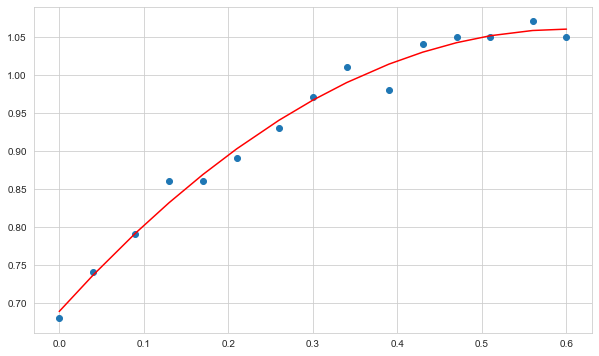

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')